# TPS 02 - Regresión Polinómica

**Alumna**: Lucia Berard

**Fecha**: 29/03/2025


[Link a Google Colab](https://colab.research.google.com/drive/1b3oCFJ9jkZaq6sX-_WGJoaA2GCgv4ZTs?usp=sharing)

## Consigna

Se desea predecir el peso de un pescado para venderlo en el mercado a partir de sus dimensiones y su especie. El archivo Fish.csv contiene una base de datos, donde se indica:

- **Species**: Variable categórica que representa la especie del pez. Incluye siete categorías: Bream, Roach, Whitefish, Parkki, Perch, Pike y Smelt.
Weight: Variable numérica que representa el peso del pez en gramos. Esta es la variable objetivo en los modelos de predicción de peso.

- **Length1**: Variable numérica que indica la primera medición de longitud del pez (en centímetros). Representa la distancia desde el extremo frontal del pez (como la punta del hocico) hasta la base de la cabeza o el inicio de las aletas pectorales.

- **Length2:** Variable numérica para la segunda medición de longitud del pez (en centímetros). Corresponde a la longitud estándar, que abarca desde el extremo frontal del pez hasta la base de la aleta caudal (el inicio de la cola).

- **Length3**: Variable numérica para la tercera medición de longitud del pez (en centímetros). Esta es la longitud total, desde el extremo frontal del pez hasta la punta de la aleta caudal.

- **Height**: Variable numérica que representa la altura del pez, medida en el punto más alto de su cuerpo (en centímetros).

- **Width**: Variable numérica que representa el ancho o grosor del pez (en centímetros), medida en su punto más ancho



---

## (a) Exploración de datos

<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
1. Indicar la proporción de las variables categóricas representando probabilidades. Nota: Si no sabe qué tipo de variable aleatoria es la categórica, deberá buscar dicha información.
</div>

La **variable categorica** en este caso es aquella que puede tener opciones limitadas, en este caso es `Species` cuyo valor puede ser: Perch, Bream, Roach, Pike, Smelt, Parkki o Whitefish. Estas son las diferentes especies de los peces que figuran en la lista. 

Para calcular este inciso se utilizo la funcion `value_counts` de la libreria `pandas` ([Documentacion](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts)) que devuelve un [`Series`](https://pandas.pydata.org/docs/reference/series.html) con la frecuencia en la que aparece cada fila en el dataset. Se utilizo `normalize=True` para devolver las proporciones.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from IPython.display import display, Markdown

# Cargar los datos
fish = pd.read_csv('Fish.csv')
with open("indicesforfish.json") as f:
    indices = json.load(f)

# Proporción de cada especie
species_proportion = fish['Species'].value_counts(normalize=True)

# Pasar la Series a DataFrame y renombrar columnas para mejor visualizacion
# reset_index() es una funcion de Pandas que genera un nuevo DataFrame or Series en el que el indice es tratado como una columna
df_prop = species_proportion.reset_index()
df_prop.columns = ['Especie', 'Proporción']
df_prop['Proporción'] = df_prop['Proporción'].apply(lambda x: f"{x:.2}")

display(Markdown("### 📈 Proporción de las variables categóricas representando probabilidades"))
display(df_prop)


### 📈 Proporción de las variables categóricas representando probabilidades

,Especie,Proporción
0,Perch,0.35
1,Bream,0.22
2,Roach,0.13
3,Pike,0.11
4,Smelt,0.088
5,Parkki,0.069
6,Whitefish,0.038


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
  2. Para analizar las variables numéricas, utilice el comando <strong>pairplot</strong> (seaborn).
  Explique qué representan los gráficos.
</div>



Teniendo en cuenta la informacion de la [Documentacion de Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) la imagen se puede dividir en dos partes:

- Los graficos en la diagonal (de arriba a la izquierda a abajo a la derecha): son histogramas de cada variable. 

- El resto de los graficos: graficos de dispersion que muestran la correlacion entre las variables. Cada punto es un pez y el color es la especie correspondiente. Los casos en donde hay una nube de puntos bien alineada diagonalmente indica una alta correlación entre esas variables.

Por ejemplo:

La intersección entre Weight y Length1 muestra cómo se relacionan esas dos variables (peso y longitud) para distintas especies.

¿Para qué sirve?

Este gráfico permite ver si hay correlaciones entre variables, ver si las clases (especies) se separan visualmente en algunas combinaciones de variables.


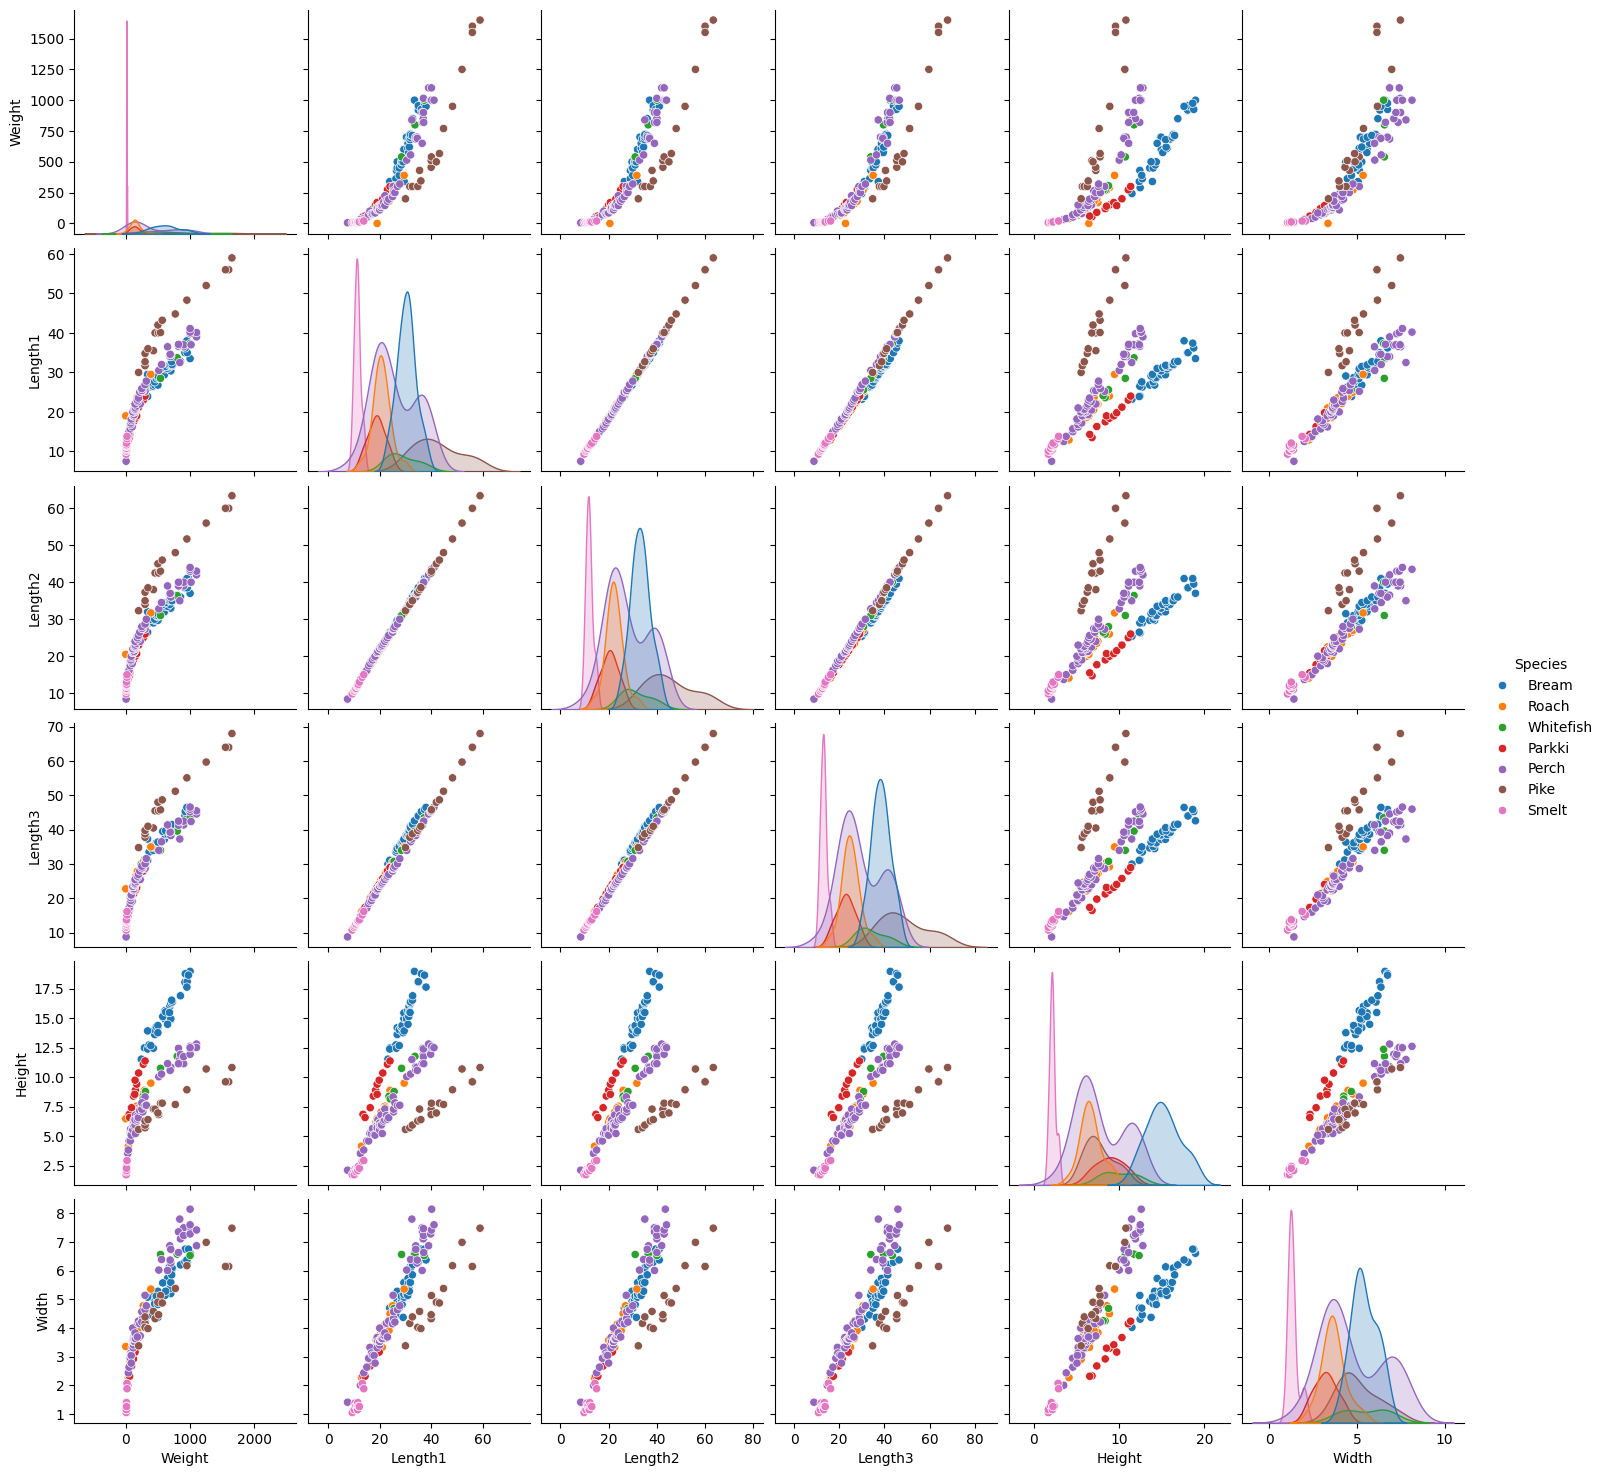

In [ ]:
# hue es el nombre de la variable en el dataset que quiero mapear por colores
sns.pairplot(fish, hue="Species")
plt.show()

<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px;">
3. Definir los conjuntos de entrenamiento, validación y testeo respetando los índices presentes en el archivo <strong>indicesforfish.json.</strong>
</div>

In [76]:
# Crear conjuntos de entrenamiento, validación y testeo
X = fish.drop(columns='Weight')
y = fish['Weight']
X_train = X.iloc[indices['train']]
X_val = X.iloc[indices['validation']]
X_test = X.iloc[indices['test']]
y_train = y.iloc[indices['train']]
y_val = y.iloc[indices['validation']]
y_test = y.iloc[indices['test']]

# Mostrar algunas filas de cada conjunto
display(Markdown("### 🐟 Conjunto de entrenamiento"))
display(X_train)
print(f"🔹Tamaño: X_train: {X_train.shape}, y_train: {y_train.shape}")


display(Markdown("### 🧪 Conjunto de validación"))
display(X_val)
print(f"🔹Tamaño: X_val: {X_val.shape}, y_val: {y_val.shape}")

display(Markdown("### 🎯 Conjunto de testeo"))
display(X_test)
print(f"🔹Tamaño: X_test: {X_test.shape}, y_test: {y_test.shape}")

### 🐟 Conjunto de entrenamiento

,Species,Length1,Length2,Length3,Height,Width
41,Roach,19.1,20.8,23.1,6.1677,3.3957
38,Roach,18.2,19.8,22.2,5.6166,3.1746
4,Bream,26.5,29.0,34.0,12.4440,5.1340
45,Roach,20.5,22.5,25.3,7.0334,3.8203
73,Perch,12.5,13.7,14.7,3.5280,1.9992
...,...,...,...,...,...,...
98,Perch,22.6,24.6,26.2,6.7334,4.1658
22,Bream,31.5,34.5,39.7,15.5227,5.2801
7,Bream,27.6,30.0,35.0,12.6700,4.6900
78,Perch,16.8,18.7,19.4,5.1992,3.1234


🔹Tamaño: X_train: (100, 6), y_train: (100,)


### 🧪 Conjunto de validación

,Species,Length1,Length2,Length3,Height,Width
97,Perch,22.0,24.0,25.5,6.3750,3.8250
61,Parkki,13.5,14.7,16.5,6.8475,2.3265
37,Roach,17.5,18.8,21.2,5.5756,2.9044
94,Perch,21.0,23.0,24.5,5.2185,3.6260
2,Bream,23.9,26.5,31.1,12.3778,4.6961
65,Parkki,18.4,20.0,22.4,8.8928,3.2928
119,Perch,36.9,40.0,42.3,11.9286,7.1064
95,Perch,21.5,23.5,25.0,6.2750,3.7250
134,Pike,40.0,42.5,45.5,7.2800,4.3225
142,Pike,56.0,60.0,64.0,9.6000,6.1440


🔹Tamaño: X_val: (44, 6), y_val: (44,)


### 🎯 Conjunto de testeo

,Species,Length1,Length2,Length3,Height,Width
157,Smelt,13.2,14.3,15.2,2.8728,2.0672
72,Perch,7.5,8.4,8.8,2.1120,1.4080
39,Roach,18.6,20.0,22.2,6.2160,3.5742
53,Roach,25.0,27.0,30.6,8.5680,4.7736
130,Pike,32.7,35.0,38.8,5.9364,4.3844
136,Pike,40.1,43.0,45.8,7.7860,5.1296
18,Bream,30.9,33.5,38.6,15.6330,5.1338
127,Perch,41.1,44.0,46.6,12.4888,7.5958
141,Pike,52.0,56.0,59.7,10.6863,6.9849
115,Perch,34.6,37.0,39.3,10.5717,6.3666


🔹Tamaño: X_test: (15, 6), y_test: (15,)


---

## (b) Pre-procesamiento

<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
1. Utilizar el comando <strong>OneHotEncoder</strong> (sklearn) para codificar las variables categóricas como one-hot. Nota: En caso de no conocer el concepto, buscar información sobre one-hot encoding.
</div>


Un codificador One-Hot ([OneHotEncoder](https://scikit-learn.org/1.6/modules/generated/sklearn.preprocessing.OneHotEncoder.html)) transforma variables categóricas (en este caso "Species") en columnas numéricas binarias. Esto es útil porque los modelos no pueden trabajar directamente con texto. El one-hot encoding evita darle un orden falso a las categorías (como ocurriría si se utiliza "Roach" → 1, "Pike" → 2, etc.).


In [99]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

# One-hot encoding de la variable categórica
cat_encoder = OneHotEncoder(sparse_output=False)


Para entender mejor el funcionamiento del algoritmo de OneHotEncoder, se armo el siguiente ejemplo:

In [100]:
species = fish[['Species']]

display(Markdown("#### 🔹 Datos originales"))
display(species)

encoded = cat_encoder.fit_transform(species)

encoded_columns = cat_encoder.get_feature_names_out(['Species'])
display(Markdown("#### Nombres de las columnas codificadas: agrupa los items que aparecen por lo menos una vez"))
print(encoded_columns)

# Crear DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded, columns=cat_encoder.get_feature_names_out(['Species']))

display(Markdown("#### 🧬 One-Hot Encoding aplicado a la variable 'Species' (se concateno la columna \"Species\" original con los resultados del encoder):"))
display(pd.concat([species, encoded_df], axis=1))


#### 🔹 Datos originales

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
...,...
154,Smelt
155,Smelt
156,Smelt
157,Smelt


#### Nombres de las columnas codificadas: agrupa los items que aparecen por lo menos una vez

['Species_Bream' 'Species_Parkki' 'Species_Perch' 'Species_Pike'
 'Species_Roach' 'Species_Smelt' 'Species_Whitefish']


#### 🧬 One-Hot Encoding aplicado a la variable 'Species' (se concateno la columna "Species" original con los resultados del encoder):

,Species,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bream,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bream,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
154,Smelt,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,Smelt,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,Smelt,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,Smelt,0.0,0.0,0.0,0.0,0.0,1.0,0.0


En este caso la columna "Species" de los datos originales se convirtio en 7 columnas binarias ['Species_Bream' 'Species_Parkki' 'Species_Perch' 'Species_Pike','Species_Roach' 'Species_Smelt' 'Species_Whitefish'], donde cada fila tiene un 1 en la categoría correspondiente y 0 en las otras.




<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
2. Utilice el comando <strong>PolynomialFeatures</strong> (sklearn) para crear un mapa polinómico de orden 2 sobre las variables numéricas (exceptuando el peso del pescado).
</div>

[`PolinomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) genera nuevas variables combinando las variables numéricas originales elevándolas a potencias y multiplicándolas entre sí, hasta cierto grado (por defecto, grado 2). Se usa para expandir el espacio de características y permitir que un modelo lineal (como regresión lineal) pueda capturar relaciones no lineales entre las variables.

En este caso se va a generar una tabla donde las columnas son:

- Las variables originales: Length1, Length2, Length3, Height, Width.

- Sus cuadrados (Length1², Height², etc.).

- Sus productos cruzados (Length1 * Length2, Height * Width, etc.).

Al igual que con `OneHotEncoder`, con `PolynomialFeature solo necesito crearlo de esta manera:

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

Para entender mejor como funciona se planteo lo siguiente:

In [102]:

# Mapeo polinómico de grado 2 sobre las variables numéricas (sin incluir Weight)
num_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
X_num = fish[num_features]

X_poly = poly.fit_transform(X_num)

# Mostrar columnas generadas
columnsPoly = poly.get_feature_names_out(num_features)
display(Markdown("### 🧮 Columnas generadas"))
print(columnsPoly)

# Crear DataFrame con nombres de nuevas columnas
X_poly_df = pd.DataFrame(X_poly, columns=columnsPoly)

# Mostrar las primeras filas
display(Markdown("### 🧮 Mapeo polinómico de orden 2 sobre las variables numéricas"))
display(X_poly_df)

### 🧮 Columnas generadas

['Length1' 'Length2' 'Length3' 'Height' 'Width' 'Length1^2'
 'Length1 Length2' 'Length1 Length3' 'Length1 Height' 'Length1 Width'
 'Length2^2' 'Length2 Length3' 'Length2 Height' 'Length2 Width'
 'Length3^2' 'Length3 Height' 'Length3 Width' 'Height^2' 'Height Width'
 'Width^2']


### 🧮 Mapeo polinómico de orden 2 sobre las variables numéricas

,Length1,Length2,Length3,Height,Width,Length1^2,Length1 Length2,Length1 Length3,Length1 Height,Length1 Width,Length2^2,Length2 Length3,Length2 Height,Length2 Width,Length3^2,Length3 Height,Length3 Width,Height^2,Height Width,Width^2
0,23.2,25.4,30.0,11.5200,4.0200,538.24,589.28,696.00,267.26400,93.26400,645.16,762.00,292.60800,102.10800,900.00,345.60000,120.60000,132.710400,46.310400,16.160400
1,24.0,26.3,31.2,12.4800,4.3056,576.00,631.20,748.80,299.52000,103.33440,691.69,820.56,328.22400,113.23728,973.44,389.37600,134.33472,155.750400,53.733888,18.538191
2,23.9,26.5,31.1,12.3778,4.6961,571.21,633.35,743.29,295.82942,112.23679,702.25,824.15,328.01170,124.44665,967.21,384.94958,146.04871,153.209933,58.127387,22.053355
3,26.3,29.0,33.5,12.7300,4.4555,691.69,762.70,881.05,334.79900,117.17965,841.00,971.50,369.17000,129.20950,1122.25,426.45500,149.25925,162.052900,56.718515,19.851480
4,26.5,29.0,34.0,12.4440,5.1340,702.25,768.50,901.00,329.76600,136.05100,841.00,986.00,360.87600,148.88600,1156.00,423.09600,174.55600,154.853136,63.887496,26.357956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,132.25,140.30,154.10,24.03960,16.02640,148.84,163.48,25.50288,17.00192,179.56,28.01136,18.67424,4.369772,2.913181,1.942121
155,11.7,12.4,13.5,2.4300,1.2690,136.89,145.08,157.95,28.43100,14.84730,153.76,167.40,30.13200,15.73560,182.25,32.80500,17.13150,5.904900,3.083670,1.610361
156,12.1,13.0,13.8,2.2770,1.2558,146.41,157.30,166.98,27.55170,15.19518,169.00,179.40,29.60100,16.32540,190.44,31.42260,17.33004,5.184729,2.859457,1.577034
157,13.2,14.3,15.2,2.8728,2.0672,174.24,188.76,200.64,37.92096,27.28704,204.49,217.36,41.08104,29.56096,231.04,43.66656,31.42144,8.252980,5.938652,4.273316


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
3. Combinar y posteriormente normalizar las salidas de las operaciones anteriores. Nota: Herramientas recomendadas son <strong>ColumnTransformer</strong> y <strong>StandardScaler</strong> (sklearn). Recordar que la normalización se define durante el entrenamiento.
</div>

`ColumnTrasnformer` permite aplicar distintas transformaciones a distintas columnas de un DataFrame.
En este caso:
- A la variable categórica 'Species' → OneHotEncoder
- A numéricas → PolynomialFeatures

`StandardScaler` normaliza variables numéricas para que:
- media = 0
- desvío estándar = 1

In [87]:
from sklearn.compose import ColumnTransformer

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_encoder, ['Species']),
    ('poly', poly, num_features)
])

# Normalizador
scaler = StandardScaler()


----

## (c) Regresión Lineal

<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
1. Utilizar el comando <strong>Pipeline</strong> (sklearn) para combinar las operaciones anteriores con una regresión lineal. Nota: Se recomienda utilizar <strong>LinearRegression</strong> (sklearn).
</div>

`Pipeline` encadena varios pasos en una única estructura, para que se pueda entrenar y predecir todo de una vez.
Es muy útil para evitar errores y automatizar el flujo.

En este caso se proprocesa, se normaliza y despues se aplica la regresion lineal

`LinearRegression` crea un modelo de regresión lineal. Encuentra la mejor recta que predice una variable continua (como el peso del pez) a partir de otras.

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.metrics import mean_squared_error

# Pipeline completo
model = Pipeline([
    ('pre', preprocessor),
    ('scaler', scaler),
    ('reg', LinearRegression())
])


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
2. ¿Cuántos parámetros tiene el modelo? Explicar por qué.
</div>

`One-Hot Encoder sobre 'Species'`: hay 7 especies diferentes por lo que genera 7 columnas.

`PolynomialFeatures (grado 2) sobre 5 variables numéricas`: 20 en total (5 variables numericas, sus cuadrados y sus multiplicadores cruzados) 
   
Por lo que el total de features (parámetros) es:
- One-hot: 7
- Polynomial: 20

Total: 27 features

La regresión lineal ajusta un parámetro (peso) por cada feature + 1 bias/intercepto:

$
\boxed{Parametros totales = 28}
$



<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
3. Utilizar <strong>set_config(display="diagram")</strong> (sklearn) para hacer un diagrama del sistema definido.
</div>

`set_config(display='diagram')` es una función de `scikit-learn` que permite visualizar gráficamente un pipeline o modelo compuesto (como un Pipeline o un ColumnTransformer) en forma de diagrama jerárquico, directamente en un Jupyter Notebook o Google Colab

In [111]:
# Mostrar diagrama del pipeline
set_config(display='diagram')
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Species']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width'])])),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])



<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
4. Entrenar el sistema descrito anteriormente.
</div>

In [112]:
# Entrenar
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Species']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width'])])),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
5. Reportar el error cuadrático medio de entrenamiento y validación.
</div>

In [117]:
# MSE
train_mse = mean_squared_error(y_train, model.predict(X_train))
val_mse = mean_squared_error(y_val, model.predict(X_val))

display(Markdown(f"""
### 📉 Error Cuadrático Medio (MSE)

- 🏋️ **Entrenamiento:** `{train_mse:.2f}`
- 🧪 **Validación:** `{val_mse:.2f}`

El MSE mide cuánto se desvía en promedio el modelo entre el valor real y la predicción, penalizando más los errores grandes.
"""))



### 📉 Error Cuadrático Medio (MSE)

- 🏋️ **Entrenamiento:** `1454.62`
- 🧪 **Validación:** `4242.85`

El MSE mide cuánto se desvía en promedio el modelo entre el valor real y la predicción, penalizando más los errores grandes.


---

## (d) Regularización con Ridge

<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
1. Utilizar `Ridge` (sklearn) para entrenar una regresión lineal regularizada para diferentes valores de 0 <  λ < 25.
</div>

`Ridge` es una variante de la regresión lineal que aplica **regularización L2**, lo que significa que penaliza los coeficientes grandes del modelo para evitar el sobreajuste (overfitting).

Minimiza la siguiente expresión:

$
\text{Loss} = \sum (y - \hat{y})^2 + \lambda \sum w_i^2
$

- $\lambda$ controla la fuerza de la penalización.
- $ w_i $ son los coeficientes del modelo.


In [120]:
from sklearn.linear_model import Ridge
import numpy as np

# Evaluar distintos valores de lambda
lambdas = np.linspace(0.1, 25, 50)
train_errors = []
val_errors = []

for l in lambdas:
    ridge_model = Pipeline([
        ('pre', preprocessor),
        ('scaler', scaler),
        ('reg', Ridge(alpha=l))
    ])
    ridge_model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, ridge_model.predict(X_train)))
    val_errors.append(mean_squared_error(y_val, ridge_model.predict(X_val)))

display(Markdown("""
> 🔍 Se entrenó un modelo de `Ridge` (regresión lineal regularizada con penalización L2) para **50 valores distintos de λ (alpha)** entre 0.1 y 25.  
>
> Se evaluó el error cuadrático medio (MSE) sobre el conjunto de entrenamiento y validación para analizar el **compromiso entre sesgo y varianza**.  
"""))



> 🔍 Se entrenó un modelo de `Ridge` (regresión lineal regularizada con penalización L2) para **50 valores distintos de λ (alpha)** entre 0.1 y 25.  
>
> Se evaluó el error cuadrático medio (MSE) sobre el conjunto de entrenamiento y validación para analizar el **compromiso entre sesgo y varianza**.  


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
2. Graficar el error cuadrático medio de entrenamiento y validación en función del hiperparámetro lambda (λ).
</div>

### 📉 Error Cuadrático Medio (MSE) para distintos valores de λ

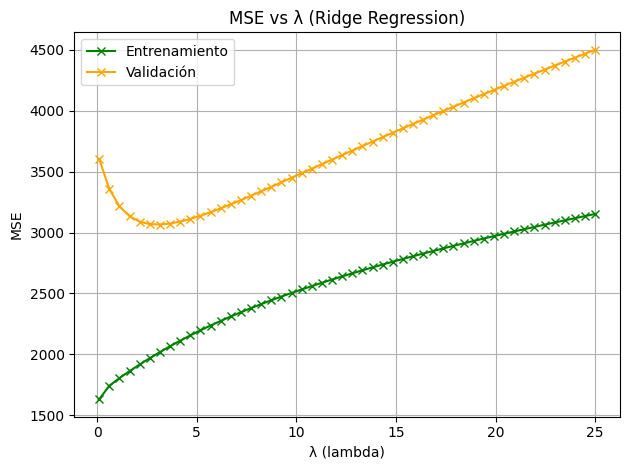

In [131]:


# Mostrar en Markdown
display(Markdown("### 📉 Error Cuadrático Medio (MSE) para distintos valores de λ"))

# Graficar
plt.plot(lambdas, train_errors, label='Entrenamiento', marker='x', color='green')
plt.plot(lambdas, val_errors, label='Validación', marker='x', color='orange')
plt.xlabel('λ (lambda)')
plt.ylabel('MSE')
plt.title('MSE vs λ (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
3. Reportar el  lambda (λ) que minimiza el error cuadrático medio de validación.
</div>

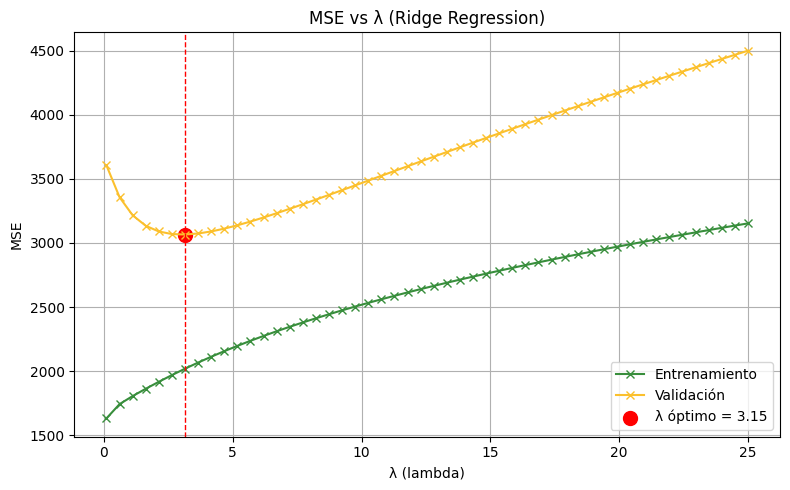

In [ ]:
# Encontrar mejor lambda
best_idx = np.argmin(val_errors)
best_lambda = lambdas[best_idx]
best_val_error = val_errors[best_idx]

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(lambdas, train_errors, label='Entrenamiento', marker='x', color='#388E3C')
plt.plot(lambdas, val_errors, label='Validación', marker='x', color='#FBC02D')

# Punto óptimo
plt.scatter(best_lambda, best_val_error, color='red', s=100, label=f'λ óptimo = {best_lambda:.2f}')
plt.axvline(best_lambda, color='red', linestyle='--', linewidth=1)

# Estética
plt.xlabel('λ (lambda)')
plt.ylabel('MSE')
plt.title('MSE vs λ (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="background-color: #e0f7fa; color: black; padding: 15px; border-left: 5px solid #00acc1; border-radius: 5px; width: 90%">
4. Reportar el error cuadrático medio de testeo para el  lambda (λ) obtenido anteriormente.
</div>

In [133]:
from sklearn.metrics import mean_squared_error
from IPython.display import display, Markdown

# Entrenar con mejor lambda
best_model = Pipeline([
    ('pre', preprocessor),
    ('scaler', scaler),
    ('reg', Ridge(alpha=best_lambda))
])
best_model.fit(X_train, y_train)

# Calcular MSE en test
test_mse = mean_squared_error(y_test, best_model.predict(X_test))

# Mostrar resultado
display(Markdown(f"""
### ✅ Evaluación final del modelo

Se entrenó el modelo `Ridge` usando el mejor valor de regularización encontrado:

- **λ óptimo:** `{best_lambda:.2f}`

Se evaluó el modelo sobre el conjunto de **testeo** (nunca visto durante el entrenamiento ni validación):

- 🧪 **MSE en testeo:** `{test_mse:.2f}`

Este valor representa el error cuadrático medio que comete el modelo al predecir pesos sobre datos completamente nuevos.
"""))



### ✅ Evaluación final del modelo

Se entrenó el modelo `Ridge` usando el mejor valor de regularización encontrado:

- **λ óptimo:** `3.15`

Se evaluó el modelo sobre el conjunto de **testeo** (nunca visto durante el entrenamiento ni validación):

- 🧪 **MSE en testeo:** `2036.22`

Este valor representa el error cuadrático medio que comete el modelo al predecir pesos sobre datos completamente nuevos.
